In [ ]:
#Importing required libraries.

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Convolution2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Importing dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Connecting Data from Google Drive

In [ ]:
data_location = '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid'
CLASS_NAMES = ['covid-19', 'healthy'] 
IMAGE_SHAPE = (256, 256, 3)
BATCH_SIZE = 10
EPOCHS = 50
DATASET_SIZE = sum([len(files) for r, d, files in os.walk(data_location)])

In [ ]:
DATASET_SIZE  

121

#We had very few covid-positive datas. So we did data augmentation to create new covid-positive datas by changong some attributes from existing datas

In [ ]:
import keras
import cv2
import os
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range =5,    
                         rescale=1./255, 
                         shear_range=0.2, 
                         zoom_range=0.3, 
                         horizontal_flip = True, 
                         fill_mode = 'nearest', 
                         data_format='channels_last', 
                         brightness_range=[0.2,1.0])


img_dir = "/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
path, dirs, files = next(os.walk("/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid"))
file_count = len(files) #to find number of files in folder

for batch in datagen.flow (x, batch_size=1, save_to_dir =r'/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train/covid',save_prefix="a",save_format='jpg'):
    i+=1
    if i==file_count:
      break

In [ ]:
# import os

# filelist = [ f for f in os.listdir("/content/drive/MyDrive/DeepLearningPorject/data_set/train/new") if f.endswith(".jpg") ]
# for f in filelist:
#     os.remove(os.path.join("/content/drive/MyDrive/DeepLearningPorject/data_set/train/new", f))

In [ ]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        brightness_range=[0.2,1.0],
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode = 'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 1236 images belonging to 2 classes.
Found 1573 images belonging to 2 classes.


In [ ]:

#Initializing the CNN
#There is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Dropout(0.25))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3,input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
# classifier.add(Dropout(0.25))


#step -3 Flattening
classifier.add(Flatten())

#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

In [ ]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
steps_per_epoch = len(training_set)//BATCH_SIZE
validation_steps = len(test_set)//BATCH_SIZE # if you have test data


results = classifier.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=test_set,
                    validation_steps=validation_steps,
                    workers=1)
print(len(training_set))
print(len(test_set))

Epoch 1/100
3/3 [==============================] - 3s 940ms/step - loss: 0.6905 - accuracy: 0.4453 - val_loss: 0.6147 - val_accuracy: 0.9375
Epoch 2/100
3/3 [==============================] - 2s 848ms/step - loss: 0.6393 - accuracy: 0.8789 - val_loss: 0.4806 - val_accuracy: 0.9625
Epoch 3/100
3/3 [==============================] - 2s 688ms/step - loss: 0.5745 - accuracy: 0.8266 - val_loss: 0.3735 - val_accuracy: 0.9250
Epoch 4/100
3/3 [==============================] - 2s 808ms/step - loss: 0.5719 - accuracy: 0.7799 - val_loss: 0.3155 - val_accuracy: 0.9125
Epoch 5/100
3/3 [==============================] - 2s 696ms/step - loss: 0.4936 - accuracy: 0.8351 - val_loss: 0.2603 - val_accuracy: 0.9312
Epoch 6/100
3/3 [==============================] - 2s 671ms/step - loss: 0.4981 - accuracy: 0.8203 - val_loss: 0.1735 - val_accuracy: 0.9625
Epoch 7/100
3/3 [==============================] - 2s 844ms/step - loss: 0.4306 - accuracy: 0.8672 - val_loss: 0.3224 - val_accuracy: 0.9000
Epoch 8/100
3

In [ ]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

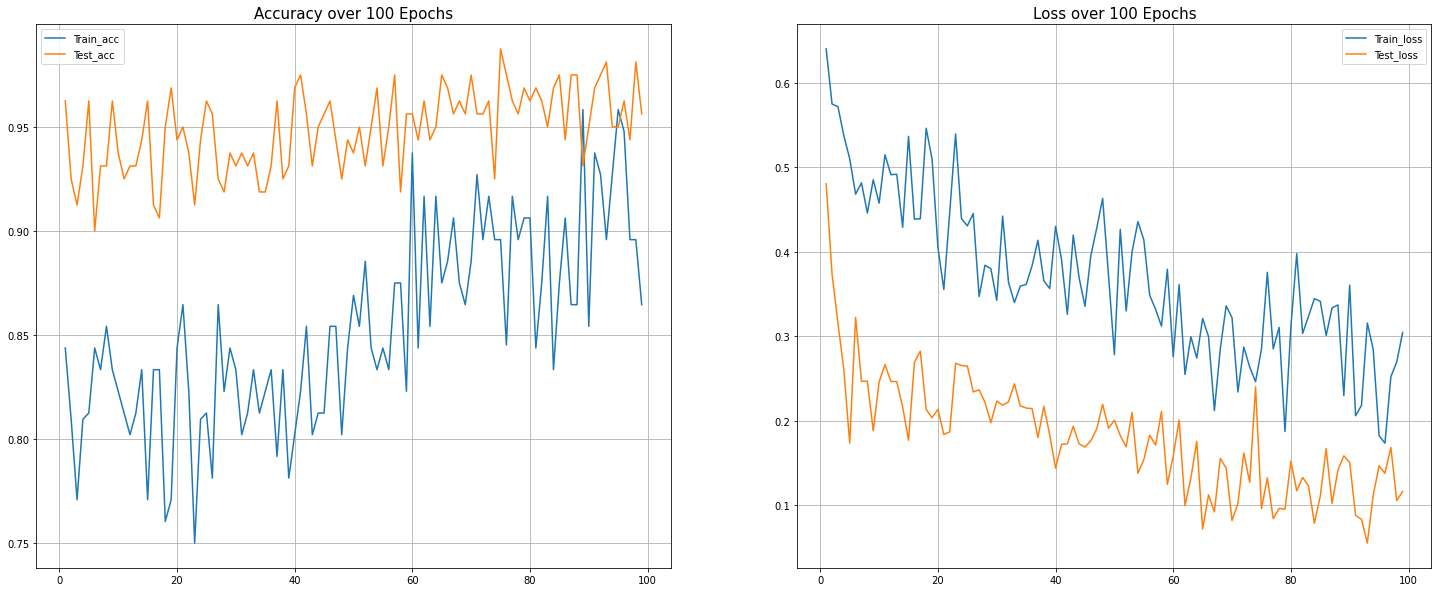

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(25, 10))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

In [ ]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)

{'covid': 0, 'non': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


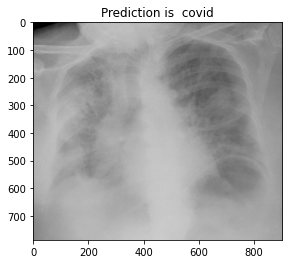

In [ ]:

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Test Image

imagePath = "/content/drive/MyDrive/DeepLearningPorject/data_set/check/Khela/test/covid/16660_1_1.jpg"

img=mpimg.imread(imagePath)
imgplot = plt.imshow(img)

test_image = image.load_img(imagePath, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

result

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'

    
# print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

In [ ]:
loss, accuracy = classifier.evaluate(test_set, steps = validation_steps)



print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("---------------------------")

5/5 [==============================] - 1s 100ms/step - loss: 0.0316 - accuracy: 0.9937
Loss: 0.03
Accuracy: 0.99
---------------------------
